# Creating temporally and spatially consistent sequences of channel matrices

In [7]:
import numpy as np
from neoradium import DeepMimoData, TrjChannel, Carrier, AntennaPanel, random

In [8]:
# Replace this with the folder on your computer where you store DeepMIMO scenarios
dataFolder = "/data/RayTracing/DeepMIMO/Scenarios/V4/"
DeepMimoData.setScenariosPath(dataFolder)

# Create a DeepMimoData object
deepMimoData = DeepMimoData("asu_campus_3p5")
deepMimoData.print()


DeepMimoData Properties:
  Scenario:                   asu_campus_3p5
  Version:                    4.0.0a3
  UE Grid:                    rx_grid
  Grid Size:                  411 x 321
  Base Station:               BS (at [166. 104.  22.])
  Total Grid Points:          131,931
  UE Spacing:                 [1. 1.]
  UE bounds (xyMin, xyMax)    [-225.55 -160.17], [184.45 159.83]
  UE Height:                  1.50
  Carrier Frequency:          3.5 GHz
  Num. paths (Min, Avg, Max): 0, 6.21, 10
  Num. total blockage:        46774
  LOS percentage:             19.71%




Trajectory Properties:
  start (x,y,z):         (-164.55, 39.83, 1.50)
  No. of points:         201752
  curIdx:                0 (0.00%)
  curSpeed:              [0.85 0.85 0.  ]
  Total distance:        242.08 meters
  Total time:            201.751 seconds
  Average Speed:         1.200 mps
  Carrier Frequency:     3.5 GHz
  Paths (Min, Avg, Max): 1, 8.97, 10
  Totally blocked:       0
  LOS percentage:        32.84%



(<Figure size 742.518x471.734 with 1 Axes>,
 <Axes: title={'center': 'Map of LOS/NLOS paths'}, xlabel='X', ylabel='Y'>)

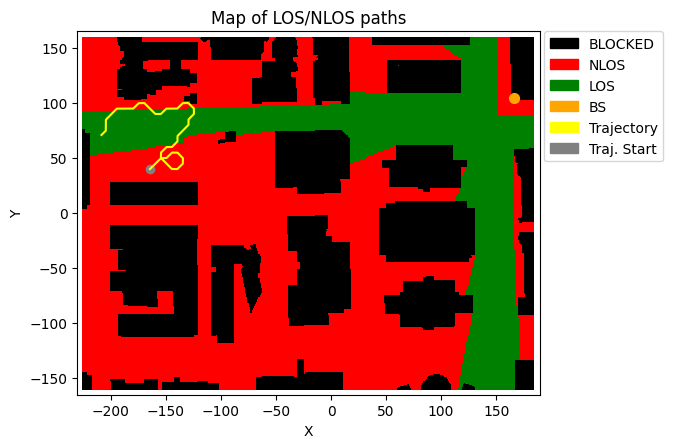

In [9]:
random.setSeed(123)                                 # Make results reproducible

# Create the carrier:
carrier = Carrier(startRb=0, numRbs=25, spacing=15) # Carrier with 25 Resource Blocks, 15KHz subcarrier spacing
bwp = carrier.curBwp                                # The only bandwidth part in the carrier

# Create a random trajectory at waking speed.
trajectory = deepMimoData.getRandomTrajectory(xyBounds=np.array([[-210, 40], [-120, 100]]),   # Traj. bounds
                                              segLen=5,               # Num grid points on shortest segment
                                              bwp=bwp,                # The bandwidth part
                                              trajLen=200,            # Number of grid points on trajectory
                                              speedMps=1.2)           # Speed in mps (Walking)

trajectory.print()                                  # Print the trajectory information
deepMimoData.drawMap("LOS-NLOS", trajectory)        # Draw the Map with the trajectory

In [10]:
# Create a MIMO channel model based on our trajectory.
channel = TrjChannel(bwp, trajectory,
                     txAntenna = AntennaPanel([2,4], polarization="x"),       # 8 TX antenna
                     txOrientation = [180,0,0],                               # Facing to the left
                     rxAntenna = AntennaPanel([1,2], polarization="x"))       # 2 RX antenna
print(channel)


TrjChannel Properties:
  carrierFreq:          3.5 GHz
  normalizeGains:       True
  normalizeOutput:      True
  normalizeDelays:      True
  xPolPower:            10.00 (db)
  filterLen:            16 samples
  delayQuantSize:       64
  stopBandAtten:        80 db
  dopplerShift:         14.015298117569412 Hz
  coherenceTime:        0.030191451092315417 Sec.
  TX Antenna:
    Total Elements:     16
    spacing:            0.5𝜆, 0.5𝜆
    shape:              2 rows x 4 columns
    polarization:       x
  RX Antenna:
    Total Elements:     4
    spacing:            0.5𝜆, 0.5𝜆
    shape:              1 rows x 2 columns
    polarization:       x
    Orientation (𝛼,𝛃,𝛄): 0° 0° 0°
  Trajectory:
    start (x,y,z):         (-164.55, 39.83, 1.50)
    No. of points:         201752
    curIdx:                0 (0.00%)
    curSpeed:              [0.85 0.85 0.  ]
    Total distance:        242.08 meters
    Total time:            201.751 seconds
    Average Speed:         1.200 mps
    Carrier

In [11]:
# Now create a sequence generator that generates up to 20 sequences with sequences
# of length 10, containing every other slot.

# Trajectory Points:         0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 ...
# Channels in the sequence:  0   1   2   3   4   5     6     7     8     9     0     1  ...
# Sequence Number:           0   0   0   0   0   0     0     0     0     0     1     1  ...
chanSeqGen = channel.getChanSeqGen(seqPeriod=2, seqLen=10, maxNumSeq=20)


In [12]:
chanSeqGen.reset()
for i, chanSeq in enumerate(chanSeqGen):
    print(f"Shape of Sequence {i}: {chanSeq.shape}")

Shape of Sequence 0: (10, 14, 300, 4, 16)
Shape of Sequence 1: (10, 14, 300, 4, 16)
Shape of Sequence 2: (10, 14, 300, 4, 16)
Shape of Sequence 3: (10, 14, 300, 4, 16)
Shape of Sequence 4: (10, 14, 300, 4, 16)
Shape of Sequence 5: (10, 14, 300, 4, 16)
Shape of Sequence 6: (10, 14, 300, 4, 16)
Shape of Sequence 7: (10, 14, 300, 4, 16)
Shape of Sequence 8: (10, 14, 300, 4, 16)
Shape of Sequence 9: (10, 14, 300, 4, 16)
Shape of Sequence 10: (10, 14, 300, 4, 16)
Shape of Sequence 11: (10, 14, 300, 4, 16)
Shape of Sequence 12: (10, 14, 300, 4, 16)
Shape of Sequence 13: (10, 14, 300, 4, 16)
Shape of Sequence 14: (10, 14, 300, 4, 16)
Shape of Sequence 15: (10, 14, 300, 4, 16)
Shape of Sequence 16: (10, 14, 300, 4, 16)
Shape of Sequence 17: (10, 14, 300, 4, 16)
Shape of Sequence 18: (10, 14, 300, 4, 16)
Shape of Sequence 19: (10, 14, 300, 4, 16)
